I will train a model to predict weather with machine learning. We will act as if we do not have access to the weather forecast. We have access to a century of historical averages of global temperatures, including global maximum temperatures, global minimum temperatures, and global land and ocean temperatures. Having all this, we know that this is a supervised regression machine learning problem.

## Weather Dataset to Predict Weather
First of all, we need some data, the data I am using to predict weather with machine learning was created from one of the most prestigious research universities in the world, we will assume that the data in the dataset is true

In [31]:
import pandas as pd
global_temp = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/GlobalTemperatures.csv')

In [32]:
print(global_temp.shape)
print(global_temp.columns)
print(global_temp.info())
print(global_temp.isnull().sum())

(3192, 9)
Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   

## Data Preparation
Unfortunately, we’re not quite at the point where we can just feed the raw data into a model and have it send back a response. We will need to make some minor edits to put our data in a machine learning model.

The exact steps in data preparation will depend on the model used and the data collected, but some amount of data manipulation will be required. First, I’ll create a function called wrangle () in which I’ll call our dataframe:

In [33]:
# Data Preparation
def wrangle(df):
    df=df.copy()
    df=df.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty",
                          "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)
    return df

We want to make a copy of the dataframe so as not to corrupt the original. After that, we are going to remove the columns that have high cardinality.

High cardinality refers to columns whose values ​​are very rare or unique. Given the frequency of high cardinality data in most time-series datasets, we will solve this problem directly by completely removing these high cardinality columns from our dataset so as not to confuse our model in the future. 

Now, I will create a function to convert temperature, and to convert the columns into DateTime object:

In [34]:
df= global_temp.copy()

In [35]:
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [36]:
 
def converttemp(x):
    x = (x * 1.8) + 32
    return float(x)
    
df["LandAverageTemperature"] = df["LandAverageTemperature"].apply(converttemp)
df["LandMaxTemperature"] = df["LandMaxTemperature"].apply(converttemp)
df["LandMinTemperature"] = df["LandMinTemperature"].apply(converttemp)
df["LandAndOceanAverageTemperature"] = df["LandAndOceanAverageTemperature"].apply(converttemp)
df["dt"] = pd.to_datetime(df["dt"])
df["Month"] = df["dt"].dt.month
df["Year"] = df["dt"].dt.year
df = df.drop("dt", axis=1)
df = df.drop("Month", axis=1)
df = df.set_index(["Year"])
df = df.dropna()
df = wrangle(df)
print(df.head())

      LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
Year                                                                   
1850                 33.3482             46.8356             26.2292   
1850                 37.5278             49.9460             27.8762   
1850                 40.9172             50.6246             28.5710   
1850                 44.9906             55.2812             33.8324   
1850                 50.0072             60.1790             38.8598   

      LandAndOceanAverageTemperature  
Year                                  
1850                         55.0994  
1850                         56.4584  
1850                         57.2774  
1850                         58.4006  
1850                         59.9126  


## Visualization
Now, before moving forward with training a model to predict weather with machine learning, let’s visualize this data to find correlations between the data:

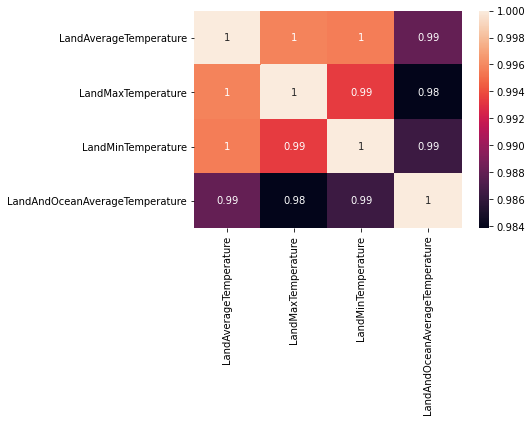

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

As we can see, and as some of you have probably guessed, the columns that we have chosen to keep moving forward are highly correlated with each other.

## Separating Our Target to Predict Weather
Now we need to separate the data into features and targets. The target, also called Y, is the value we want to predict, in this case, the actual average land and ocean temperature and features are all the columns the model uses to make a prediction:

In [42]:
target = "LandAndOceanAverageTemperature"
y = df[target]
x = df[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature"]]

## Train Test Split
Now, to create a model to predict weather with machine learning we need to split the data by using the train_test_split method provided by scikit-learn:

In [43]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.25, random_state=42)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(1494, 3)
(498, 3)
(1494,)
(498,)


# Baseline Mean Absolute Error
Before we can make and evaluate any predictions on our machine learning model to predict weather, we need to establish a baseline, a sane metric that we hope to beat with our model. If our model cannot improve from the baseline then it will fail and we should try a different model or admit that machine learning is not suitable for our problem:



In [44]:
from sklearn.metrics import mean_squared_error
ypred = [ytrain.mean()] * len(ytrain)
print("Baseline MAE: ", round(mean_squared_error(ytrain, ypred), 5))

Baseline MAE:  5.29374


## Training Model To Predict Weather
Now to predict weather with Machine Learning I will train a Random Forest algorithm which is capable of performing both the tasks of Classification as well as Regression:

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
forest = make_pipeline(
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=50,
        random_state=77,
        n_jobs=-1
    )
)
forest.fit(xtrain, ytrain)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])